# visdrone:数据集理解
visdrone的annotation的具体含义是每一行包括的内容如下：
- bbox_left<br>
    图片坐标系下bbox左上角点的x坐标
- bbox_top<br>
    图片坐标系下bbox左上角点的y坐标
- bbox_width<br>
    bbox的宽度（单位是像素）
- bbox_height<br>
    bbox的高度（单位是像素）
- score<br>
    1：bounding box可用于评估；
    0：bounding box不用于评估；
- object_category<br>
    类别
- truncation
- occlusion

图片坐标系定义为
```
|-----------------------|+ x
|
|
|
|
|
|-----------------------|
|+y
```

visdrone的类别共有12个，依次为: ignored regions(0),pedestrian (1), people(2), bicycle (3), car (4), van (5), truck (6), tricycle (7),awning-tricycle (8), bus (9), motor (10), others (11)

In [1]:
import os

In [29]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 16.0)
%matplotlib inline
import matplotlib.image as mpimg

## test1:读取图片并显示

In [5]:
base_path = r"D:\CETCA_DeepLearning\Task 1 - Object Detection in Images\VisDrone2019-DET-train"
images_path = os.path.join(base_path,"images")
annotations_path = os.path.join(base_path,"annotations")
print(images_path)
print(annotations_path)

D:\CETCA_DeepLearning\Task 1 - Object Detection in Images\VisDrone2019-DET-train\images
D:\CETCA_DeepLearning\Task 1 - Object Detection in Images\VisDrone2019-DET-train\annotations


In [6]:
img_files = os.listdir(images_path)
print(img_files[:2])

['0000002_00005_d_0000014.jpg', '0000002_00448_d_0000015.jpg']


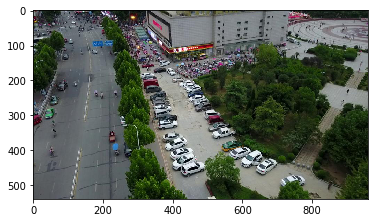

In [7]:
img_path = os.path.join(images_path,img_files[0])
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()

In [8]:
height,width = img.shape[:2]
print(f"img width={width},height={height}")

img width=960,height=540


## 叠加标签

In [9]:
label_files = os.listdir(annotations_path)
label_files[0]

'0000002_00005_d_0000014.txt'

In [10]:
label_path = os.path.join(annotations_path,label_files[0])
print(label_path)

D:\CETCA_DeepLearning\Task 1 - Object Detection in Images\VisDrone2019-DET-train\annotations\0000002_00005_d_0000014.txt


### 读取图片对应的标签并存到np array

In [11]:
lbls = None
with open(label_path) as f:
    lbls = f.readlines()
    print(lbls)

['684,8,273,116,0,0,0,0\n', '406,119,265,70,0,0,0,0\n', '255,22,119,128,0,0,0,0\n', '1,3,209,78,0,0,0,0\n', '708,471,74,33,1,4,0,1\n', '639,425,61,46,1,4,0,0\n', '594,399,64,51,1,4,0,0\n', '562,390,61,38,1,4,0,0\n', '540,372,65,33,1,4,0,1\n', '514,333,68,35,1,4,0,0\n', '501,317,64,31,1,4,0,1\n', '501,299,45,28,1,4,0,1\n', '489,284,48,27,1,4,0,1\n', '463,262,48,29,1,4,0,0\n', '458,252,49,22,1,4,0,1\n', '448,242,45,20,1,4,0,1\n', '442,230,49,19,1,4,0,1\n', '439,214,45,21,1,4,0,1\n', '429,208,42,19,1,4,0,1\n', '420,199,43,20,1,4,0,1\n', '398,188,41,18,1,4,0,1\n', '46,391,14,26,1,2,0,0\n', '421,433,74,44,1,4,0,1\n', '369,346,64,34,1,4,0,0\n', '398,410,72,46,1,4,0,1\n', '394,393,70,36,1,4,0,1\n', '377,364,71,38,1,4,0,0\n', '357,312,58,31,1,4,0,0\n', '359,298,54,22,1,4,0,2\n', '348,283,43,28,1,5,0,1\n', '345,271,52,19,1,4,0,1\n', '340,260,60,18,1,5,0,1\n', '340,250,52,16,1,4,0,1\n', '332,231,54,22,1,5,0,1\n', '323,213,45,25,1,5,0,0\n', '317,195,45,31,1,6,0,1\n', '316,188,36,15,1,4,0,2\n', '3

In [12]:
lbls_np = np.zeros((len(lbls),8))
print(lbls_np.shape)
for i,lbl in enumerate(lbls):
    res = [int(num) for num in lbl.split(',')]
    lbls_np[i,:] = np.array(res)
lbls_np

(88, 8)


array([[684.,   8., 273., 116.,   0.,   0.,   0.,   0.],
       [406., 119., 265.,  70.,   0.,   0.,   0.,   0.],
       [255.,  22., 119., 128.,   0.,   0.,   0.,   0.],
       [  1.,   3., 209.,  78.,   0.,   0.,   0.,   0.],
       [708., 471.,  74.,  33.,   1.,   4.,   0.,   1.],
       [639., 425.,  61.,  46.,   1.,   4.,   0.,   0.],
       [594., 399.,  64.,  51.,   1.,   4.,   0.,   0.],
       [562., 390.,  61.,  38.,   1.,   4.,   0.,   0.],
       [540., 372.,  65.,  33.,   1.,   4.,   0.,   1.],
       [514., 333.,  68.,  35.,   1.,   4.,   0.,   0.],
       [501., 317.,  64.,  31.,   1.,   4.,   0.,   1.],
       [501., 299.,  45.,  28.,   1.,   4.,   0.,   1.],
       [489., 284.,  48.,  27.,   1.,   4.,   0.,   1.],
       [463., 262.,  48.,  29.,   1.,   4.,   0.,   0.],
       [458., 252.,  49.,  22.,   1.,   4.,   0.,   1.],
       [448., 242.,  45.,  20.,   1.,   4.,   0.,   1.],
       [442., 230.,  49.,  19.,   1.,   4.,   0.,   1.],
       [439., 214.,  45.,  21.,

## 生成类别颜色

In [111]:
def draw_colors(colors):
    frame = np.zeros((4*32,4*32,3))
    for i,color in enumerate(colors):
        ix = i//4
        iy = i%4
        frame[ix*32:(ix+1)*32,iy*32:(iy+1)*32,:] = np.array(color)
    plt.imshow(frame.astype('uint8'))

### 连续颜色

In [74]:
def generate_colors(num):
    '''
    根据目标数量，生成相同数量的颜色
    '''
    colors = []
    if num == 1:
        colors = [(255,0,0)]
    elif num == 2:
        colors = [(255,0,0),(0,255,0)]
    else:
        step = 255 // (num//3 + 1)
        color = [0,0,0]
        for i in range(3):
            for j in range(0,255,step):
                color[i] = 255 - j
                colors.append(tuple(color))
            color[i] = 0
    return colors[:num]


In [78]:
color_num = 16
colors = generate_colors(color_num)
print(colors)
frame = np.zeros((4*32,4*32,3))
for i,color in enumerate(colors):
    ix = i//4
    iy = i%4
    frame[ix*32:(ix+1)*32,iy*32:(iy+1)*32,:] = np.array(color)

[(255, 0, 0), (213, 0, 0), (171, 0, 0), (129, 0, 0), (87, 0, 0), (45, 0, 0), (3, 0, 0), (0, 255, 0), (0, 213, 0), (0, 171, 0), (0, 129, 0), (0, 87, 0), (0, 45, 0), (0, 3, 0), (0, 0, 255), (0, 0, 213)]


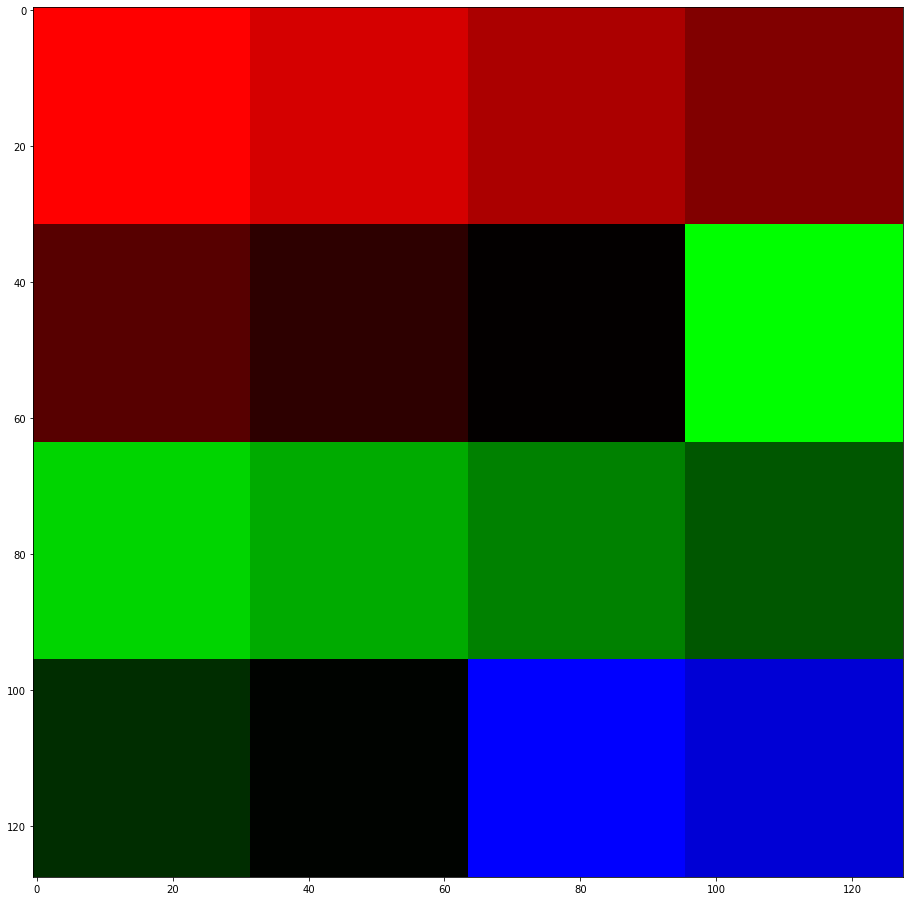

In [80]:
plt.imshow(frame.astype('uint8'))

### 加载调色板(效果最好)

In [14]:
import pickle as pkl
colors = pkl.load(open("resources/pallete", "rb"))
colors = np.array(colors)

In [116]:
print(f"there {len(colors)} different colors in pallete")

there 100 different colors in pallete


In [15]:
import random
color = random.choice(colors)

In [16]:
idx = np.random.choice(range(len(colors)),16)
colors = colors[idx]

In [17]:
frame = np.zeros((4*32,4*32,3))
for i,color in enumerate(colors):
    ix = i//4
    iy = i%4
    frame[ix*32:(ix+1)*32,iy*32:(iy+1)*32,:] = np.array(color)

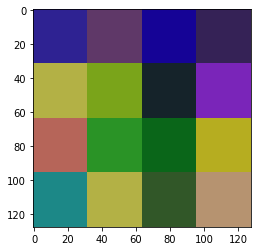

In [18]:
plt.imshow(frame.astype('uint8'))

### 随机生成

In [105]:
import colorsys
import random

def get_n_hls_colors(num):
    hls_colors = []
    i = 0
    step = 360.0 / num
    while i < 360:
        h = i
        s = 90 + random.random() * 10
        l = 50 + random.random() * 10
        _hlsc = [h / 360.0, l / 100.0, s / 100.0]
        hls_colors.append(_hlsc)
        i += step

    return hls_colors

def ncolors(num):
    rgb_colors = []
    if num < 1:
        return rgb_colors
    hls_colors = get_n_hls_colors(num)
    for hlsc in hls_colors:
        _r, _g, _b = colorsys.hls_to_rgb(hlsc[0], hlsc[1], hlsc[2])
        r, g, b = [int(x * 255.0) for x in (_r, _g, _b)]
        rgb_colors.append([r, g, b])

    return rgb_colors

In [110]:
colors = ncolors(16)
colors = np.array(colors)
colors

array([[242,  24,  24],
       [252, 120,  40],
       [246, 199,  59],
       [225, 252,  39],
       [129, 251,   7],
       [ 73, 254,  48],
       [ 40, 254,  93],
       [ 52, 250, 176],
       [ 30, 254, 254],
       [ 13, 162, 250],
       [ 42,  94, 251],
       [ 67,  41, 254],
       [130,  10, 249],
       [222,   1, 254],
       [244,  55, 197],
       [248,  16, 103]])

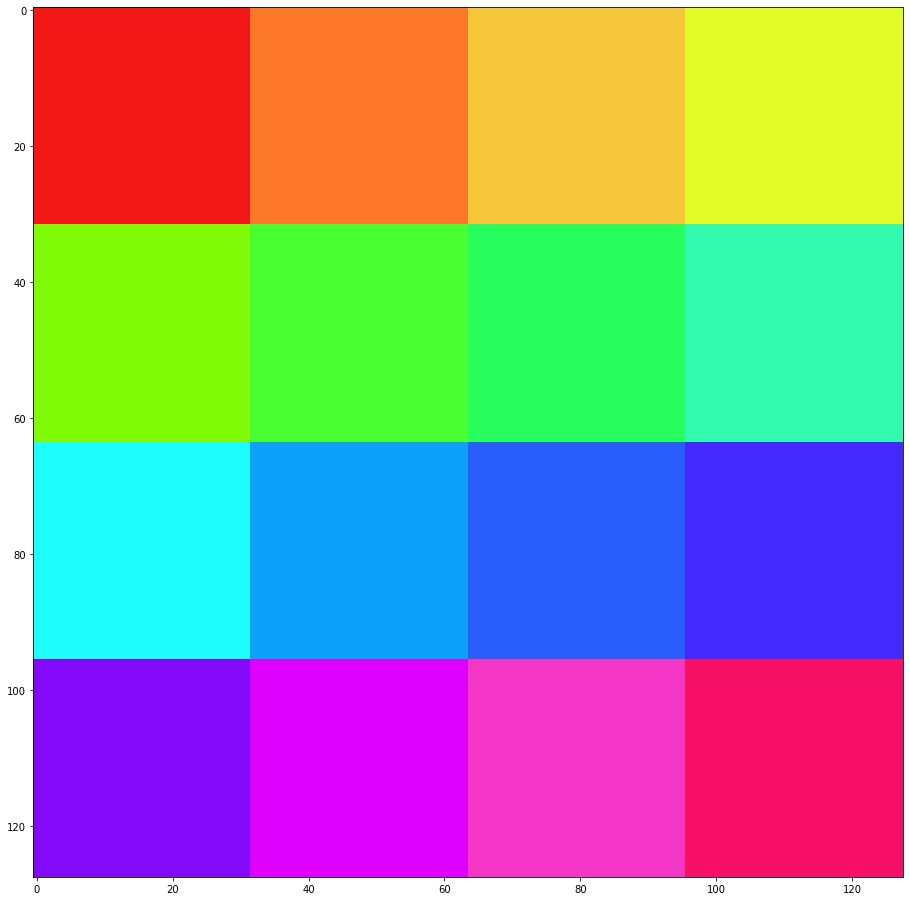

In [112]:
draw_colors(colors)

## 根据标签将方框绘制在图片中

### 读取图片

In [75]:
import cv2
import numpy as np
#frame = cv2.imread(r"H:\deepLearning\dataset\visdrone\Task 1 - Object Detection in Images\train\VisDrone2019-DET-train\images\0000002_00005_d_0000014.jpg")
img_path = os.path.join(images_path,img_files[0])
frame = cv2.imread(img_path)



In [20]:
cv2.imwrite('frame.jpg',frame)

True

In [21]:
frame.shape

(540, 960, 3)

In [26]:
import pickle as pkl
import random
colors = pkl.load(open("resources/pallete", "rb"))
print(random.choice(colors))
colors = np.array(colors)

(74, 188, 190)


### label

In [35]:
label_path = os.path.join(annotations_path,label_files[0])
lbls = None
with open(label_path) as f:
    lbls = f.readlines()
    #print(lbls)
    
label = np.zeros((len(lbls),8))
print(label.shape)
for i,lbl in enumerate(lbls):
    res = [int(num) for num in lbl.split(',')]
    label[i,:] = np.array(res)

(88, 8)


In [27]:
idx = np.random.choice(range(len(colors)),16)
colors = colors[idx]

In [ ]:
label[label[:,-4]>0]

In [47]:
area = label[:,2] + label[:,3]
area.s

array([389., 335., 247., 287., 107., 107., 115.,  99.,  98., 103.,  95.,
        73.,  75.,  77.,  71.,  65.,  68.,  66.,  61.,  63.,  59.,  40.,
       118.,  98., 118., 106., 109.,  89.,  76.,  71.,  71.,  78.,  68.,
        76.,  70.,  76.,  51.,  61.,  55.,  48.,  35.,  20.,  48.,  51.,
        73.,  46.,  53.,  60.,  54.,  54.,  56.,  30.,  28.,  26.,  14.,
        21.,  44.,  25.,  31.,  25.,  31.,  32.,  30.,  27.,  21.,  20.,
        20.,  22.,  16.,  20.,  18.,  19.,  22.,  25.,  17.,  16.,  15.,
        11.,  13.,  22.,  13.,  29.,  20.,  14.,  47., 107.,  19.,  18.])

### 叠加显示
Note: rerun above codes first

#### 显示所有目标框

[684.   8. 273. 116.   0.   0.   0.   0.]
[406. 119. 265.  70.   0.   0.   0.   0.]
[255.  22. 119. 128.   0.   0.   0.   0.]
[  1.   3. 209.  78.   0.   0.   0.   0.]


True

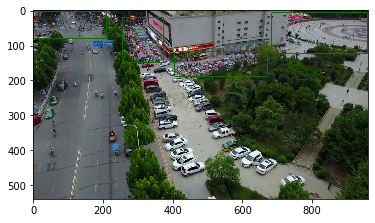

In [72]:
label_select = label[:4]

for i,lbl in enumerate(label_select):
    print(lbl)
    p1 = (int(lbl[0]), int(lbl[1]))
    p2 = (int(lbl[0]+lbl[2]), int(lbl[1]+lbl[3]))
    #print(p1,p2)
    c = int(lbl[5])
    color = tuple(colors[c])
    #print(type(color[0])
    #print(color)
    cv2.rectangle(frame, p1, p2, (int(color[0]),int(color[1]),int(color[2])), 2)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame.astype('uint8'))
cv2.imwrite('frame.jpg',frame)

#### 显示单目标框
如果框住了多个目标，则不显示，

True

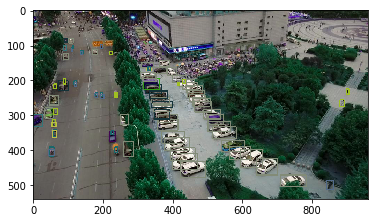

In [77]:
for i,lbl in enumerate(label):
    #print(lbl)
    p1 = (int(lbl[0]), int(lbl[1]))
    p2 = (int(lbl[0]+lbl[2]), int(lbl[1]+lbl[3]))
    #print(p1,p2)
    c = int(lbl[5])
    color = tuple(colors[c])
    #print(type(color[0])
    #print(color)
    if lbl[4]>=1:
        cv2.rectangle(frame, p1, p2, (int(color[0]),int(color[1]),int(color[2])), 2)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame.astype('uint8'))
cv2.imwrite('frame.jpg',frame)